<a id='section_id0'></a>
# Data Programming Essentials *with Python*

## Final part 2: Modeling 1 : Linear Regression

<font color="#740202">**Table of contents:**

|No.|Topic||No.|Topic||No.|Topic|
|:------|:------||:------|:------||:------|:------|
|1.|[Key Libraries](#section_id1)||2.|[Sleeping Dataset](#section_id3)  |
|3.|[Regression Analysis with Statsmodels](#section_id4)  ||4.|[Regression Analysis with Scikit](#section_id5)  ||5.|[K-fold Cross Validation](#section_id6)  |
|6.|[Variable selection approaches](#section_id7)  ||7.|[Lasso and Ridge Regressions](#section_id8)||9.|[References](#section_id9)|

***

<a id='section_id1'></a>
### <span style="background-color:#B0E0E6">Key libraries</span>
* The following are the main libraries we'll use for modeling with linear regressions:
* [Statsmodels](https://www.statsmodels.org/stable/index.html)
    * This library is suitable when your main goal for analysis is "explanation". It provides easy reference to a host of statistics that can help with hypothesis testing exercises. 
* [Scikit-learn](https://scikit-learn.org/stable/index.html)
    * This is a very popular package for machine learning in Python. Compiling explanation-oriented statistics is a little cumbersome with this package, but it provides powerful tools for prediction-oriented analysis.
* [DMBA](https://pypi.org/project/dmba/)
    * This is the set of utilities associated with the reference book I suggested: [Data Mining for Business Analytics](https://www.dataminingbook.com/book/python-edition)
    * You can freely access the book and download individual PDF book chapters through the [Pitt library](https://pitt.summon.serialssolutions.com/#!/search?bookMark=ePnHCXMw42JgAfZbU5khpymBDxSztADNrHEZgbYtA2tc0K0CXMBq3gRYkwA7SJwMSi6JJYkKueALERSATTUF6P2LxQqJoIM5QMcV8zCwpgGjI5WXgaWkqBRYcEq7uYY4e-iCDkeKhw50xAPTkpmJBejiIfyyKlhkYXM9QGVA95qYGQMA-383uA)
    * Linear regression is covered in chapter 6 of the DMBA book.

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# for regressions with statsmodels:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# for regressions with scikit-learn:
import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

In [4]:
#These are utility tools of the DMBA book. 
#Install the "dmba" package first (just one time)

!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

no display found. Using non-interactive Agg backend


In [5]:
# visualization and tuning the aesthetics
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (6, 5))

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id3'></a>
### <span style="background-color:#B0E0E6">Sleelping Dataset: check and explore</span>

|Variable|Description|
|:------|:------|
|sleeping|sleep hours on an average shcool night: 1=<4 hrs, 2=5 hrs, 3=6 hrs, 4=7 hrs, 5=8 hrs, 6=9 hrs, 7= >=10 hrs|
|sex|1=Female, 2=Male|
|race|1=White, 2=Black or African American, 3=Hispanic/Latino, 4=All other races|
|sexharass|sexual harassment during the past 12 months: 1=0 times, 2=1 time, 3=2 or 3 times, 4=4 or 5 times, 5=6 or more times|
|smoking|smoke cigarettes during the past 30 days: 1=0 days, 2=1 or 2 days, 3=3 to 5 days, 4= 6 to 9 days, 5=10 to 19 days, 6=20 to 29 days, 7=all 30 days|
|vegetables|eating other vegetables(do not count green salad, potatoes, or carrots) during the past 7 days: 1=0 times, 2=1 to 3 times, 3=4 to 6 times, 4=1 time/day, 5=2 times/day, 6=3 times/day, 7=>= 4 times/day|
|soda|drinking soda or pop during past 7 days: 1= 0 times, 2=1 to 3 times, 3=4 to 6 times, 4=1 time/day, 5=2 times/day, 6=3 times/day, 7=>=4 times/day |
|breakfast|days of eating breakfast per week: 1=0 day, 2=1 day, 3=2 days, 4=3 days, 5= 4 days, 6=5 days, 7=6 days, 8= 7 days|
|computer|hours of playing computer games or something that is not school work per day: 1=0 hrs, 2=<1 hr, 3=1 hr, 4=2 hrs, 5=3 hrs, 6=4 hrs, 7=>=5 hrs|

In [6]:
df1 = pd.read_csv('sleeping.csv')

In [7]:
df1.describe()

,sleeping,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer
count,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000,36220.000000
mean,3.508007,1.481336,2.064633,1.186554,1.250028,2.556102,2.410574,5.098896,3.930204
std,1.398969,0.499658,1.226763,0.631294,0.988877,1.360694,1.490681,2.657106,2.191636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,4.000000
75%,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000,3.000000,8.000000,6.000000
max,7.000000,2.000000,4.000000,5.000000,7.000000,7.000000,7.000000,8.000000,7.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36220 entries, 0 to 36219
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sleeping    36220 non-null  int64
 1   sex         36220 non-null  int64
 2   race        36220 non-null  int64
 3   sexharass   36220 non-null  int64
 4   smoking     36220 non-null  int64
 5   vegetables  36220 non-null  int64
 6   soda        36220 non-null  int64
 7   breakfast   36220 non-null  int64
 8   computer    36220 non-null  int64
dtypes: int64(9)
memory usage: 2.5 MB


In [9]:
df1.isna().sum().sum()

0

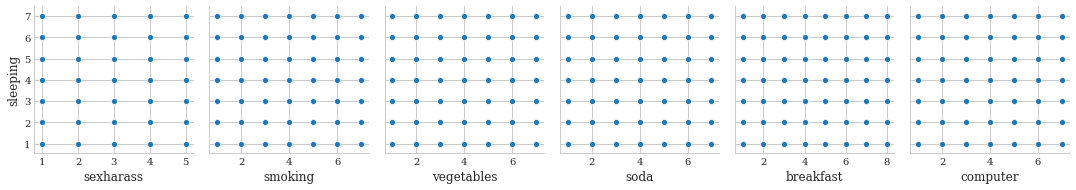

In [10]:
sns.pairplot(data=df1, y_vars=['sleeping'], x_vars=['sexharass', 'smoking', 'vegetables', 'soda', 'breakfast', 'computer'])

In [11]:
df1.corr() # doesn't make a lot sense since most of variables are categorical

,sleeping,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer
sleeping,1.000000,0.050891,-0.073107,-0.100934,-0.097065,0.053879,-0.061425,0.264238,-0.055082
sex,0.050891,1.000000,-0.008730,-0.131154,0.031740,-0.011861,0.110614,0.060118,0.034058
race,-0.073107,-0.008730,1.000000,0.014876,-0.029708,-0.022442,-0.052377,-0.037561,0.025410
sexharass,-0.100934,-0.131154,0.014876,1.000000,0.146019,0.024699,0.051952,-0.084936,0.017453
smoking,-0.097065,0.031740,-0.029708,0.146019,1.000000,0.003918,0.173174,-0.089880,-0.016917
vegetables,0.053879,-0.011861,-0.022442,0.024699,0.003918,1.000000,-0.014684,0.157419,-0.033184
soda,-0.061425,0.110614,-0.052377,0.051952,0.173174,-0.014684,1.000000,-0.087709,0.132579
breakfast,0.264238,0.060118,-0.037561,-0.084936,-0.089880,0.157419,-0.087709,1.000000,-0.001090
computer,-0.055082,0.034058,0.025410,0.017453,-0.016917,-0.033184,0.132579,-0.001090,1.000000


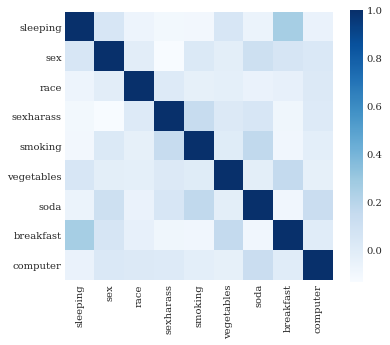

In [12]:
# Draw a correlation heatmap 
corrmat = df1.corr()
sns.heatmap(corrmat, square = True, cmap="Blues")

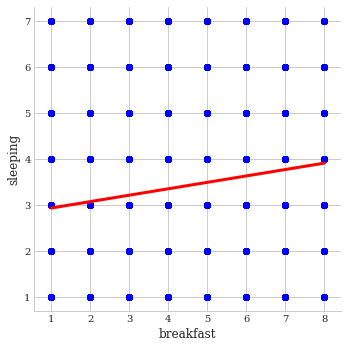

In [13]:
sns.lmplot(x="breakfast", y="sleeping", data=df1, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

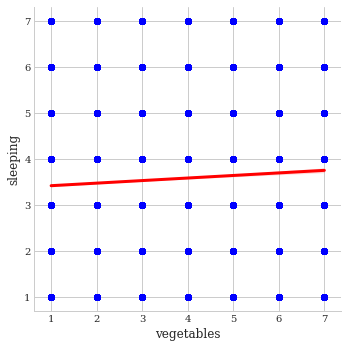

In [14]:
sns.lmplot(x="vegetables", y="sleeping", data=df1, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id4'></a>
### <span style="background-color:#B0E0E6">Regression Analysis with Statsmodels</span>

In [15]:
y=df1['sleeping']
X=df1[['sex', 'race', 'sexharass', 'smoking', 'vegetables', 'soda', 'breakfast', 'computer']]
X=sm.add_constant(X)
model1 = sm.OLS(y, X) 
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sleeping   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     441.0
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:05:23   Log-Likelihood:                -61870.
No. Observations:               36220   AIC:                         1.238e+05
Df Residuals:                   36211   BIC:                         1.238e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2925      0.038     86.553      0.000       3.218       3.367
sex            0.0956      0.014      6.682      0.000       0.068       0.124
race          -0.0734      0.006    -12.792      0.000      -0.085      -0.062
sexharass     -0.1404      0.011    -12.332      0.000      -0.163      -0.118
smoking       -0.0924      0.007    -12.652      0.000      -0.107      -0.078
vegetables     0.0146      0.005      2.791      0.005       0.004       0.025
soda          -0.0241      0.005     -4.938      0.000      -0.034      -0.015
breakfast      0.1284      0.003     47.423      0.000       0.123       0.134
computer      -0.0322      0.003     -9.949      0.000      -0.039      -0.026
==============================================================================
Omnibus:                      118.749   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.370
Skew:                           0.066   Prob(JB):                     2.64e-22
Kurtosis:                       2.780   Cond. No.                         46.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* All variables are statistically significant.

<div style="text-align: right"> <a href='#section_id5'>Compare with Scikit model results</a></div>

#### Comparing the predicted values with actual values

In [16]:
predictions1=results1.predict(X)
predictions1.head()

0    2.542921
1    3.099771
2    3.043958
3    3.393959
4    2.796403
dtype: float64

In [17]:
df1['predicted_sleep']=predictions1

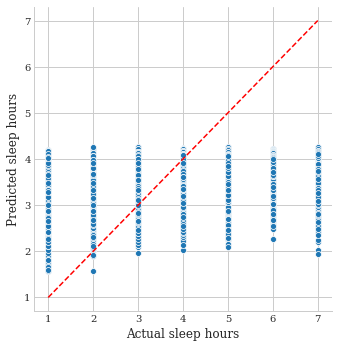

In [18]:
g=sns.relplot(x="sleeping", y="predicted_sleep", data=df1) #store the plot in "g"
g.set(xlabel="Actual sleep hours", ylabel="Predicted sleep hours") #set lables for axes
mn = min(df1.sleeping.min(), df1.predicted_sleep.min()) #generate min coordinates for line
mx = max(df1.sleeping.max(), df1.predicted_sleep.max()) #generate max coordinates for line
points = np.linspace(mn, mx, 100) #generate points of the line
plt.plot(points, points, color='r', linestyle='--', linewidth=1.5) #add the line to the plot
plt.show() #show the full plot
#plt.gca().plot(points, points, color='r', linestyle='--', linewidth=1.5) #also works

#### Evaluate prediction performance using RMSE

In [19]:
sm.tools.eval_measures.rmse(df1.sleeping, df1.predicted_sleep, axis=0)

1.3354128787088242

In [20]:
np.sqrt(np.square(df1.sleeping-df1.predicted_sleep).mean()) 

1.335412878708824

 * Interpretation: Suppose, sleeping duration is measured in hour, our prediction is deviant from the actual values by about 1.34 hours, on average.
 * Whether that accuracy of prediction is good or not is a subjective decision, depending on the business context.

In [21]:
# We can also use this handy function from the DMBA package to print all the metrics in one go.
regressionSummary(df1.sleeping, df1.predicted_sleep)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1.3354
            Mean Absolute Error (MAE) : 1.0691
          Mean Percentage Error (MPE) : -25.2167
Mean Absolute Percentage Error (MAPE) : 46.6518


#### Regression diagnostics

In [22]:
residuals=results1.resid #provided by statsmodels
# residuals=advertising.Sales-advertising.predicted_sales #manual calculation

#### Normality of residuals

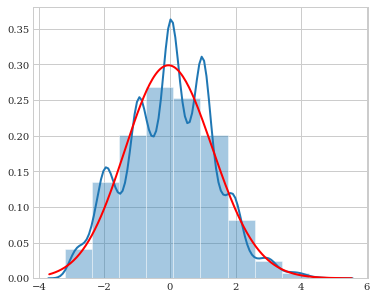

In [23]:
sns.distplot(residuals, bins=10, kde=True, hist=True, fit=stats.gamma, fit_kws={"color":"red"})

* The assumption related to the normality of the residuals seem to be okay.
 * The q-q plot is another way to visualize this. If the residuals are normally distributed, they should all line up along the red reference line in the chart below.

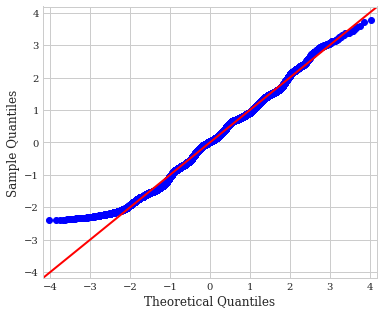

In [24]:
fig=sm.qqplot(residuals, stats.t, fit=True, line='45')
plt.show()

* The QQ-plot seems like a pretty straight line with a light tail. This pattern is relatively harmless and we can proceed with methods that assume normality safely.
* Reference: https://arc.lib.montana.edu/book/statistics-with-r-textbook/item/57#This%20pattern%20is%20relatively%20harmless%20and%20you%20can%20proceed%20with%20methods%20that%20assume%20normality%20safely.

More formal tests of the normality assumption:
* Jarque-Bera test compares the skewness and kurtosis of the residuals with the normal distribution. The null hypothesis is that the residuals are normally distributed. So a desirable result is to get a p-value of >0.05 in the hypothesis test using the JB test.
* Skewness of the normal distribution is 0.
* Kurtosis of the normal distribution is 3. 
* The omni_normtest is similar to the JB test and uses both kurtosis and skewness to formulate a test statistic. Once again, the null hypothesis is that the residuals are normally distributed.

In [25]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results1.resid)
lzip(name, test)

[('Jarque-Bera', 99.36998191384278),
 ('Chi^2 two-tail prob.', 2.6429113376263764e-22),
 ('Skew', 0.06566213076263207),
 ('Kurtosis', 2.779549980095038)]

In [26]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results1.resid)
lzip(name, test)

[('Chi^2', 118.7493308736093),
 ('Two-tail probability', 1.6364789974270564e-26)]

#### Heteroskedasticity

* Null hypothesis in these tests is homoskedasticity or the residual variance does not depend on the variables in the X matrix.
* In the BP test, heteroskedasticity is treated as a linear function of all the independent variables in the model.
* In the GQ test, sample observations are divided into two groups, and evidence of heteroskedasticity is based on a comparison of the residual sum of squares (RSS) using the F-statistic.

In [27]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(results1.resid, results1.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 411.00618600357876),
 ('p-value', 8.275605470936843e-84),
 ('f-value', 51.952538371653425),
 ('f p-value', 2.6891392584379348e-84)]

* Since p-value is less than 0.05, we fail to reject null hypothesis and say residual is normally distributed.

In [28]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results1.resid, results1.model.exog)
lzip(name, test)

[('F statistic', 0.8976721808136641), ('p-value', 0.9999999999998064)]

#### Multicollinearity
* Condition number is a metric that tries to capture the variables that are similarly explaining high proportions of variances in the response variable.
* Condition numbers above 30 usually indicate the presence of multicollinearity.

In [29]:
np.linalg.cond(results1.model.exog)

46.46683613319301

* Since the condition number is greater than 30, we say there exists multicolinearity among independent variables.

#### Outliers
* Influential observations can be identified through the leverage plot.
* As a sensitivity test, we can try to omit these influential observations and see if the hypothesis testing results vary.

In [30]:
test_class = OLSInfluence(results1)
test_class.dfbetas[:5,:]

array([[ 1.69668540e-02, -1.01297543e-02, -9.36510124e-03,
        -2.57581464e-02, -1.33583052e-02, -1.78979834e-03,
         5.71360667e-03,  2.33755217e-03,  2.52587244e-03],
       [-5.20541245e-03, -1.03143699e-02, -5.50046304e-03,
         1.42709493e-03,  1.86319936e-03,  1.20633414e-03,
         8.34427260e-03,  1.36908994e-02,  6.61758251e-03],
       [-5.70607101e-03, -1.00101757e-02, -1.19546239e-02,
         1.22138949e-03,  1.72903401e-03,  7.18696807e-03,
         7.25186058e-03,  1.20530195e-02,  1.05557950e-02],
       [ 1.87090662e-03, -1.28500153e-03, -2.60764662e-03,
         3.55316688e-04,  7.92104151e-04, -6.09371710e-04,
        -2.81163270e-03, -1.50248405e-05,  4.30041801e-04],
       [-1.88824412e-03,  4.09938570e-04,  1.43926523e-03,
        -7.82370896e-04,  3.72911958e-03, -2.98937251e-04,
         1.19741678e-03,  4.23137569e-04,  9.66057883e-04]])

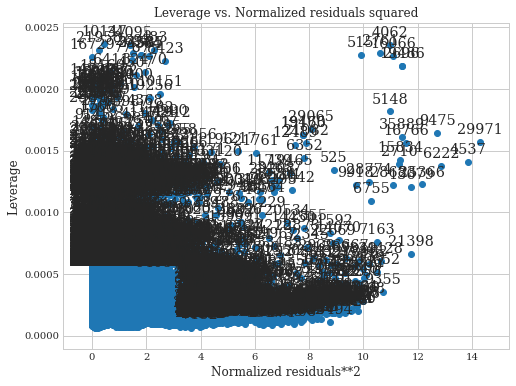

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results1, ax = ax)

* observations #  may be an outlier. 

#### Re-training the model: Exploring alternatives with interactions

In [35]:
df1['comp_soda']=df1['computer']*df1['soda']

#### Visualizing the interaction
* We can split one of the interaction term along the median for visualizing the effect
* Incomescale can be above or below median levels
* We can show the relationship between health and town size at the two levels of Incomescale
* Significant differences in the slopes provide clues about potential interaction effects

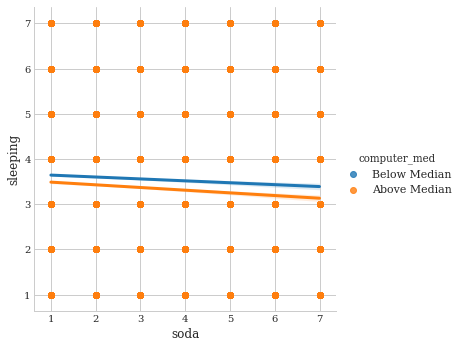

In [38]:
df2=df1
df2['computer_med'] = df2.computer > df2.computer.median()
df2['computer_med'] = np.where(df2.computer_med == False, "Below Median", "Above Median")
sns.lmplot(x='soda', y='sleeping', hue='computer_med', data=df1)

* Seems like no interatcion because the slope of two lines are roughly the same.

In [40]:
df1['sex_smoke']=df1['sexharass']*df1['smoking']

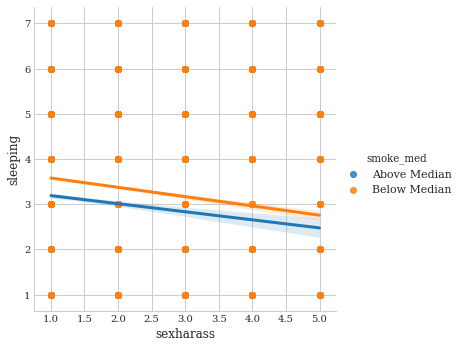

In [42]:
df2=df1
df2['smoke_med'] = df2.smoking > df2.smoking.median()
df2['smoke_med'] = np.where(df2.smoke_med == False, "Below Median", "Above Median")
sns.lmplot(x='sexharass', y='sleeping', hue='smoke_med', data=df1)

* Seems like no interatcion because the slope of two lines are roughly the same.

In [43]:
df1['comp_smoke']=df1['computer']*df1['smoking']

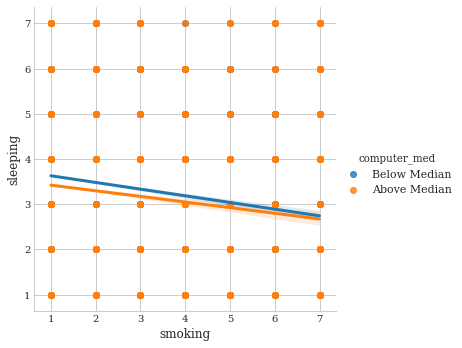

In [44]:
df2=df1
df2['computer_med'] = df2.computer > df2.computer.median()
df2['computer_med'] = np.where(df2.computer_med == False, "Below Median", "Above Median")
sns.lmplot(x='smoking', y='sleeping', hue='computer_med', data=df1)

In [45]:
df1['soda_smoke']=df1['soda']*df1['smoking']

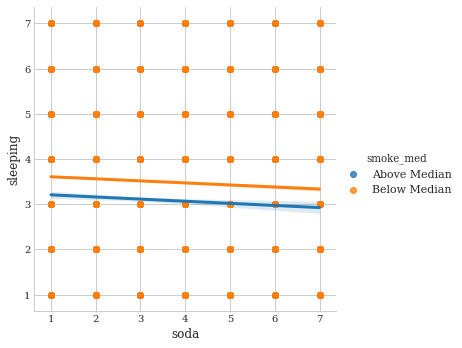

In [46]:
df2=df1
df2['smoke_med'] = df2.smoking > df2.smoking.median()
df2['smoke_med'] = np.where(df2.smoke_med == False, "Below Median", "Above Median")
sns.lmplot(x='soda', y='sleeping', hue='smoke_med', data=df1)

In [47]:
df1['veg_smoke']=df1['vegetables']*df1['smoking']

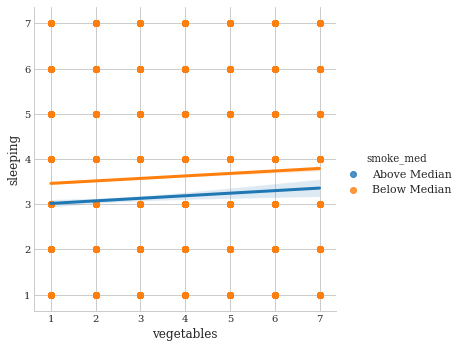

In [48]:
df2=df1
df2['smoke_med'] = df2.smoking > df2.smoking.median()
df2['smoke_med'] = np.where(df2.smoke_med == False, "Below Median", "Above Median")
sns.lmplot(x='vegetables', y='sleeping', hue='smoke_med', data=df1)

In [49]:
df1['break_smoke']=df1['breakfast']*df1['smoking']

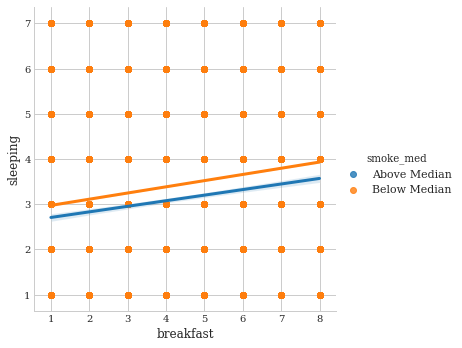

In [50]:
df2=df1
df2['smoke_med'] = df2.smoking > df2.smoking.median()
df2['smoke_med'] = np.where(df2.smoke_med == False, "Below Median", "Above Median")
sns.lmplot(x='breakfast', y='sleeping', hue='smoke_med', data=df1)

In [51]:
df1['sexual_race']=df1['sexharass']*df1['race']

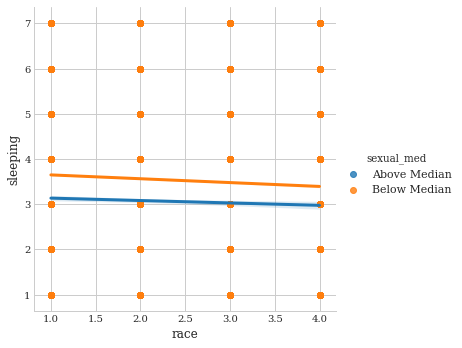

In [56]:
df2=df1
df2['sexual_med'] = df2.sexharass > df2.sexharass.median()
df2['sexual_med'] = np.where(df2.sexual_med == False, "Below Median", "Above Median")
sns.lmplot(x='race', y='sleeping', hue='sexual_med', data=df1)

In [57]:
df1.head(3)

,sleeping,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer,predicted_sleep,...,computer_med,sex_smoke,smoke_med,comp_smoke,soda_smoke,veg_smoke,break_smoke,smoking_med,race_med,sexual_med
0,1,2,4,4,4,3,2,3,3,2.542921,...,Above Median,8,Above Median,12,8,12,12,True,Above Median,Above Median
1,1,2,3,1,1,2,1,1,2,3.099771,...,Below Median,2,Below Median,2,1,2,1,False,Above Median,Below Median
2,1,2,4,1,1,1,1,1,1,3.043958,...,Below Median,2,Below Median,1,1,1,1,False,Above Median,Below Median


In [61]:
y=df1['sleeping']
X2=df1.drop(['sleeping','computer_med','smoke_med','sexual_med', 'smoking_med', 'race_med', 'predicted_sleep'], axis=1).astype('float64')
X2=sm.add_constant(X2)
model2 = sm.OLS(y, X2) 
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sleeping   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:44:15   Log-Likelihood:                -61864.
No. Observations:               36220   AIC:                         1.238e+05
Df Residuals:                   36205   BIC:                         1.239e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1844      0.065     49.263      0.000       3.058       3.311
sex             0.1783      0.033      5.337      0.000       0.113       0.244
race           -0.0492      0.018     -2.741      0.006      -0.084      -0.014
sexharass      -0.1413      0.011    -12.387      0.000      -0.164      -0.119
smoking        -0.0437      0.030     -1.464      0.143      -0.102       0.015
vegetables      0.0072      0.008      0.912      0.362      -0.008       0.023
soda           -0.0213      0.007     -2.999      0.003      -0.035      -0.007
breakfast       0.1314      0.004     29.907      0.000       0.123       0.140
computer       -0.0372      0.005     -7.246      0.000      -0.047      -0.027
sex_race       -0.0163      0.011     -1.421      0.155      -0.039       0.006
sex_smoke      -0.0394      0.014     -2.733      0.006      -0.068      -0.011
comp_smoke      0.0037      0.003      1.183      0.237      -0.002       0.010
soda_smoke     -0.0020      0.004     -0.548      0.584      -0.009       0.005
veg_smoke       0.0058      0.005      1.290      0.197      -0.003       0.015
break_smoke    -0.0024      0.003     -0.850      0.395      -0.008       0.003
==============================================================================
Omnibus:                      118.732   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.215
Skew:                           0.065   Prob(JB):                     2.86e-22
Kurtosis:                       2.779   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* It looks like among all interaciton terms, only sex_smoke is statistically significant.

In [63]:
predictions2=results2.predict(X2)
df1['predicted_sleep2']=predictions2

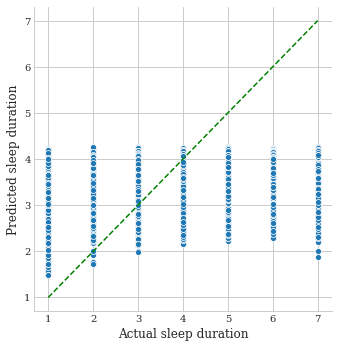

In [64]:
g2=sns.relplot(x="sleeping", y="predicted_sleep2", data=df1) #store the plot in "g2"
g2.set(xlabel="Actual sleep duration", ylabel="Predicted sleep duration") #set lables for axes
mn2 = min(df1.sleeping.min(), df1.predicted_sleep2.min()) #generate min coordinates for line
mx2 = max(df1.sleeping.max(), df1.predicted_sleep2.max()) #generate max coordinates for line
points2 = np.linspace(mn2, mx2, 100) #generate points of the line
plt.plot(points2, points2, color='g', linestyle='--', linewidth=1.5) #add the line to the plot
plt.show() #show the full plot
#plt.gca().plot(points, points, color='r', linestyle='--', linewidth=1.5) #also works

In [65]:
sm.tools.eval_measures.rmse(df1.sleeping, df1.predicted_sleep2, axis=0)

1.3351662975354046

<Mark>Interpretation:</Mark> Suppose, sleep duration is measured in hour, our prediction is deviant from the actual values by about 1.34 hours, on average. Model 2 seems to have the same prediction accuracy than Model 1<br> 

#### An alternative way to specify models in Statsmodels

In [70]:
formula='sleeping ~ sex + race + sexharass+ smoking+vegetables+soda+breakfast+ computer+ sex_race+ sex_smoke+comp_smoke+ soda_smoke+ veg_smoke+break_smoke'
model = smf.ols(formula, data=df1) 
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sleeping   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 13 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:56:59   Log-Likelihood:                -61864.
No. Observations:               36220   AIC:                         1.238e+05
Df Residuals:                   36205   BIC:                         1.239e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1844      0.065     49.263      0.000       3.058       3.311
sex             0.1783      0.033      5.337      0.000       0.113       0.244
race           -0.0492      0.018     -2.741      0.006      -0.084      -0.014
sexharass      -0.1413      0.011    -12.387      0.000      -0.164      -0.119
smoking        -0.0437      0.030     -1.464      0.143      -0.102       0.015
vegetables      0.0072      0.008      0.912      0.362      -0.008       0.023
soda           -0.0213      0.007     -2.999      0.003      -0.035      -0.007
breakfast       0.1314      0.004     29.907      0.000       0.123       0.140
computer       -0.0372      0.005     -7.246      0.000      -0.047      -0.027
sex_race       -0.0163      0.011     -1.421      0.155      -0.039       0.006
sex_smoke      -0.0394      0.014     -2.733      0.006      -0.068      -0.011
comp_smoke      0.0037      0.003      1.183      0.237      -0.002       0.010
soda_smoke     -0.0020      0.004     -0.548      0.584      -0.009       0.005
veg_smoke       0.0058      0.005      1.290      0.197      -0.003       0.015
break_smoke    -0.0024      0.003     -0.850      0.395      -0.008       0.003
==============================================================================
Omnibus:                      118.732   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.215
Skew:                           0.065   Prob(JB):                     2.86e-22
Kurtosis:                       2.779   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='section_id5'></a>
### <span style="background-color:#B0E0E6">Regression Analysis with Scikit-Learn</span>

* First, define the X (predictor/independent) and the Y (predicted/dependent) variables:
* SciKit doesn't work with Pandas dataframes, so we just need the matrix of values in the dataframe.

In [71]:
df1.columns

Index(['sleeping', 'sex', 'race', 'sexharass', 'smoking', 'vegetables', 'soda',
       'breakfast', 'computer', 'predicted_sleep', 'sex_race', 'computer_med',
       'sex_smoke', 'smoke_med', 'comp_smoke', 'soda_smoke', 'veg_smoke',
       'break_smoke', 'smoking_med', 'race_med', 'sexual_med',
       'predicted_sleep2'],
      dtype='object')

In [73]:
Y = df1.sleeping
#X = advertising[['TV', 'Radio', 'Newspaper']].values
#retain only the selected independent variables by dropping others
X3= df1.drop(['sleeping', 'predicted_sleep', 'predicted_sleep2', 'computer_med','smoke_med','sexual_med', 'smoking_med', 'race_med', 'predicted_sleep'], axis=1).values

In [74]:
X3[:8]

array([[ 2,  4,  4,  4,  3,  2,  3,  3,  8,  8, 12,  8, 12, 12],
       [ 2,  3,  1,  1,  2,  1,  1,  2,  6,  2,  2,  1,  2,  1],
       [ 2,  4,  1,  1,  1,  1,  1,  1,  8,  2,  1,  1,  1,  1],
       [ 2,  4,  1,  1,  3,  5,  5,  4,  8,  2,  4,  5,  3,  5],
       [ 2,  4,  1,  6,  2,  6,  5,  7,  8, 12, 42, 36, 12, 30],
       [ 2,  4,  1,  1,  5,  2,  4,  5,  8,  2,  5,  2,  5,  4],
       [ 2,  4,  1,  1,  3,  1,  8,  7,  8,  2,  7,  1,  3,  8],
       [ 2,  1,  1,  1,  2,  1,  3,  6,  2,  2,  6,  1,  2,  3]],
      dtype=int64)

In [75]:
# model specification
healthreg=sklm.LinearRegression()
healthreg.fit(X3, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
# look into the regression results, if desired
print('Intercept:', healthreg.intercept_)
print('sex:', healthreg.coef_[0])
print('race:', healthreg.coef_[1])
print('sexharass:', healthreg.coef_[2])
print('smoking:', healthreg.coef_[3])
print('vegetables:', healthreg.coef_[4])
print('soda:', healthreg.coef_[5])
print('breakfast:', healthreg.coef_[6])
print('computer:', healthreg.coef_[7])


Intercept: 3.18435260758488
sex: 0.17829619107447736
race: -0.04920380564868176
sexharass: -0.14126228664266105
smoking: -0.04370904129651251
vegetables: 0.007232008570165551
soda: -0.021311372504675345
breakfast: 0.13139686270621867
computer: -0.037169081543633166


In [77]:
# Fourth, get the predicted values and evaluate the training:
health_predictions=healthreg.predict(X3) # predictions for training set

* scikit does produce a [host of regression metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [78]:
np.sqrt(mean_squared_error(Y, health_predictions))

1.3351662975354046

<a id='section_id6'></a>
### <span style="background-color:#B0E0E6">K-fold Cross Validation</span>

* To simulate variance in data, we split it into training and test portions
* We are using 75% of data for "training" and 25% for validation/testing
* Random state parameter helps us to achieve the same "random" split across different computers. This can be any number. As long as we use the same number across different computers, we should get the same results.

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size=0.25, random_state=7)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(27165, 14) (27165,)
(9055, 14) (9055,)


In [80]:
#training model
healthreg2=sklm.LinearRegression()
healthreg2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# 10-fold cross validation
cvparam = KFold(10, random_state=13)
scores_mse_lm =  cross_validate(healthreg2, X_train, Y_train, cv=cvparam, scoring='neg_mean_squared_error')

C:\Users\edwar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


<Mark>Note:</Mark> 
* The features of the [cross_validate() function](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection) are quite extensive. Several ways of splitting the data are possible. Here, we are just doing a basic K-fold split (k=10 in our example).
* The MSE values from each of the three folds are stored in the scores_mse_lm array.
* The negative sign is becuase the parameter used by the algorithm is "neg_mean_squared_error", to indicate that a lower value of MSE is better. I multipled it by -1 to get the actual MSE.

In [82]:
scores_mse_lm 

{'fit_time': array([0.02210212, 0.01786494, 0.02403283, 0.0168376 , 0.01666355,
        0.01426411, 0.01757193, 0.01962757, 0.02734065, 0.01626492]),
 'score_time': array([0.        , 0.        , 0.00797844, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00479293, 0.        ]),
 'test_score': array([-1.78526285, -1.74354804, -1.71660056, -1.88309404, -1.80289184,
        -1.81474831, -1.76225283, -1.76658055, -1.7838966 , -1.8219335 ])}

In [83]:
scores_mse_lm['test_score'] # 10 cv mse

array([-1.78526285, -1.74354804, -1.71660056, -1.88309404, -1.80289184,
       -1.81474831, -1.76225283, -1.76658055, -1.7838966 , -1.8219335 ])

In [84]:
np.sqrt(scores_mse_lm['test_score'].mean()*-1)

1.3371914265540823

<Mark>Interpretation:</Mark> After we induce some variation in the training sample, by doing a 10-fold split, the accuracy of our prediction has not gone down. <br> 
Here, the 10-fold cross-validation reveals that the model is deviant from reality by about 0.71 degree.

#### Checking prediction on the out-of-training-sample (i.e., the test sample):

In [85]:
lm_predictions_tt=healthreg2.predict(X_test) #use test sample and coefficients derived from trained model
np.sqrt(np.square(lm_predictions_tt-Y_test).mean()) #compare predictions with actual values in test sample

1.3327745002011773

<Mark>Interpretation:</Mark> Our model is deviant from the actual values by about 1.33, on average, when using the test data. 
Is that good enough? That is indeed a subjective decision, depending on the business context.

#### Re-training the model by including an interaction term

In [87]:
X4 = df1[['sex', 'race', 'sexharass', 'smoking','vegetables','soda','breakfast', 'computer', 'sex_race', 'sex_smoke','comp_smoke', 'soda_smoke', 'veg_smoke','break_smoke']].values
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X4, Y, test_size=0.25, random_state=7)

In [88]:
#training model
healthreg3=sklm.LinearRegression()
healthreg3.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
# 10-fold cross validation
cvparam = KFold(10, random_state=13)
scores_mse_lm2 =  cross_validate(healthreg3, X_train2, Y_train2, cv=cvparam, scoring='neg_mean_squared_error')

C:\Users\edwar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [90]:
np.sqrt(scores_mse_lm2['test_score'].mean()*-1)

1.3371914265540823

In [91]:
lm_predictions_tt2=healthreg3.predict(X_test2) #use test sample and coefficients derived from trained model
np.sqrt(np.square(lm_predictions_tt2-Y_test2).mean()) #compare predictions with actual values in test sample

1.3327745002011773

<Mark>Interpretation:</Mark> The model is performing the same as the previous one without interaction effects. <br> 


<a id='section_id7'></a>
### <span style="background-color:#B0E0E6">Variable Selection Approaches</span>
* I'll include the interaction term in the dataset 
 * (https://pitt.summon.serialssolutions.com/#!/search?bookMark=ePnHCXMw42JgAfZbU5khpymBDxSztADNrHEZgbYtA2tc0K0CXMBq3gRYkwA7SJwMSi6JJYkKueALERSATTUF6P2LxQqJoIM5QMcV8zCwpgGjI5WXgaWkqBRYcEq7uYY4e-iCDkeKhw50xAPTkpmJBejiIfyyKlhkYXM9QGVA95qYGQMA-383uA)

In [92]:
#setting response and predictor variables, matching with the book chapter
predictors = ['sex', 'race', 'sexharass', 'smoking','vegetables','soda','breakfast', 'computer', 'sex_race', 'sex_smoke','comp_smoke', 'soda_smoke', 'veg_smoke','break_smoke']
outcome = 'sleeping'

In [93]:
# partition data
X = pd.get_dummies(df1[predictors], drop_first=True)
y = df1[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

#### Exhaustive search
* Use adjusted R-squared. Akaike Information Criteria (AIC) or Bayesian Information Criteria (BIC) to pick among the models with different subsets of predictor variables.
* Use a function from the DMBA package for implementing exhaustive search.

In [94]:
def train_model(variables):
    model = sklm.LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

In [95]:
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

In [96]:
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

In [97]:
searchresults=pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

In [98]:
searchresults

,n,r2adj,AIC,break_smoke,breakfast,comp_smoke,computer,race,sex,sex_race,sex_smoke,sexharass,smoking,soda,soda_smoke,veg_smoke,vegetables
0,1,0.070865,74504.910824,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2,0.077073,74360.213501,False,True,False,False,False,False,False,False,True,False,False,False,False,False
2,3,0.081479,74257.228749,False,True,True,False,False,False,False,False,True,False,False,False,False,False
3,4,0.085224,74169.424079,False,True,False,False,True,False,False,False,True,False,False,True,False,False
4,5,0.086848,74131.813565,False,True,False,True,True,False,False,False,True,False,False,True,False,False
5,6,0.087420,74119.195787,False,True,False,True,True,True,False,False,True,False,False,True,False,False
6,7,0.087999,74106.409665,False,True,False,True,True,True,False,False,True,True,True,False,False,False
7,8,0.088215,74102.252059,False,True,False,True,True,True,False,False,True,True,True,False,False,True
8,9,0.088246,74102.526638,False,True,False,True,True,True,False,True,True,True,True,False,False,True
9,10,0.088226,74103.993333,False,True,False,True,True,True,True,True,True,True,True,False,False,True


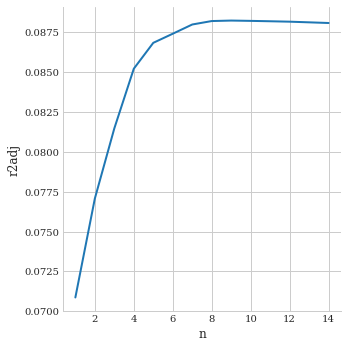

In [99]:
sns.relplot(x="n", y="r2adj", data=searchresults, kind="line")

* The model with 8 predictors is preferred. 
* eating breakfast is a dominant predictor and featured in all models

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

#### Backward elimination of variables
* We start with the "full" model and elimiate in steps the least useful predictor according to statistical significance. 
* The elimination stops when all the remaining predictors make significant contributions to the model.

In [100]:
def train_model(variables):
    model = sklm.LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: sex, race, sexharass, smoking, vegetables, soda, breakfast, computer, sex_race, sex_smoke, comp_smoke, soda_smoke, veg_smoke, break_smoke
Start: score=74111.17
Step: score=74109.18, remove veg_smoke
Step: score=74107.19, remove break_smoke
Step: score=74105.56, remove comp_smoke
Step: score=74103.99, remove soda_smoke
Step: score=74102.53, remove sex_race
Step: score=74102.25, remove sex_smoke
Step: score=74102.25, remove None
['sex', 'race', 'sexharass', 'smoking', 'vegetables', 'soda', 'breakfast', 'computer']


In [101]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.0132
       Root Mean Squared Error (RMSE) : 1.3433
            Mean Absolute Error (MAE) : 1.0768
          Mean Percentage Error (MPE) : -25.1617
Mean Absolute Percentage Error (MAPE) : 47.0280


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

#### Forward selection
* We start with the "null" model and keep adding predictors one-by-one. 
* Each added predictor wil be the one that makes the largest contribution to the R-squared value.
* The algorithm stops when additional predictors dont make significant contribution.

In [102]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = sklm.LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: sex, race, sexharass, smoking, vegetables, soda, breakfast, computer, sex_race, sex_smoke, comp_smoke, soda_smoke, veg_smoke, break_smoke
Start: score=76101.23, constant
Step: score=74504.91, add breakfast
Step: score=74360.21, add sexharass
Step: score=74257.23, add comp_smoke
Step: score=74169.72, add race
Step: score=74144.47, add soda
Step: score=74132.08, add sex
Step: score=74124.12, add sex_smoke
Step: score=74109.05, add computer
Step: score=74104.76, add vegetables
Step: score=74104.31, add smoking
Step: score=74104.31, add None
['breakfast', 'sexharass', 'comp_smoke', 'race', 'soda', 'sex', 'sex_smoke', 'computer', 'vegetables', 'smoking']


In [103]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.0131
       Root Mean Squared Error (RMSE) : 1.3431
            Mean Absolute Error (MAE) : 1.0767
          Mean Percentage Error (MPE) : -25.1631
Mean Absolute Percentage Error (MAPE) : 47.0266


#### Stepwise selection
* It works like forward selection, but we drop variables that are not statistically significant at each step (similar to backward elimination).

In [104]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: sex, race, sexharass, smoking, vegetables, soda, breakfast, computer, sex_race, sex_smoke, comp_smoke, soda_smoke, veg_smoke, break_smoke
Start: score=76101.23, constant
Step: score=74504.91, add breakfast
Step: score=74360.21, add sexharass
Step: score=74257.23, add comp_smoke
Step: score=74169.72, add race
Step: score=74144.47, add soda
Step: score=74132.08, add sex
Step: score=74124.12, add sex_smoke
Step: score=74109.05, add computer
Step: score=74104.76, add vegetables
Step: score=74102.81, remove comp_smoke
Step: score=74102.53, add smoking
Step: score=74102.25, remove sex_smoke
Step: score=74102.25, unchanged None
['breakfast', 'sexharass', 'race', 'soda', 'sex', 'computer', 'vegetables', 'smoking']


In [105]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.0132
       Root Mean Squared Error (RMSE) : 1.3433
            Mean Absolute Error (MAE) : 1.0768
          Mean Percentage Error (MPE) : -25.1617
Mean Absolute Percentage Error (MAPE) : 47.0280


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id8'></a>
### <span style="background-color:#B0E0E6">Lasso and Ridge Regression Approaches</span>
* These methods constrain the combined magnitude of the coefficients and "shrink" some coefficients towards zero. Coefficients of correlated predictors tend to produce high standard erros (or instability), which reduces predictive power. Small changes in data tend to radically shift which of these predictors are emphasized in the model.
* Lasso uses L1 penalty or the sum of absolute values of the coefficients
* Ridge uses L2 penalty or the sum of the the squared values of the coefficients
* We can let the algorithm optimally set the penalty, or alpha, through cross-validation

In [106]:
lasso_cv = sklm.LassoCV(normalize=True, cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)


Regression statistics

                      Mean Error (ME) : 0.0129
       Root Mean Squared Error (RMSE) : 1.3435
            Mean Absolute Error (MAE) : 1.0772
          Mean Percentage Error (MPE) : -25.2396
Mean Absolute Percentage Error (MAPE) : 47.0895
Lasso-CV chosen regularization:  3.568138204128176e-05
[ 0.0660699  -0.06733504 -0.14174843 -0.05869488  0.0134068  -0.02300534
  0.12770124 -0.02380074 -0.         -0.0027651  -0.         -0.004767
 -0.         -0.        ]


In [107]:
ridge_cv = sklm.RidgeCV(normalize=True, cv=5)
ridge_cv.fit(train_X, train_y)
regressionSummary(valid_y, ridge_cv.predict(valid_X))
print('Ridge-CV chosen regularization: ', ridge_cv.alpha_)
print(ridge_cv.coef_)


Regression statistics

                      Mean Error (ME) : 0.0126
       Root Mean Squared Error (RMSE) : 1.3442
            Mean Absolute Error (MAE) : 1.0802
          Mean Percentage Error (MPE) : -25.3727
Mean Absolute Percentage Error (MAPE) : 47.2646
Ridge-CV chosen regularization:  0.1
[ 0.11170252 -0.05072685 -0.13877846 -0.0517382   0.02237679 -0.02434661
  0.10792511 -0.02114279 -0.01123947 -0.01756329 -0.0023082  -0.00586503
 -0.0034266   0.0085544 ]


In [108]:
# for comparison, we can gather the estimates from OLS:
linearRegression = sklm.LinearRegression(normalize=True).fit(train_X, train_y)
regressionSummary(valid_y, linearRegression.predict(valid_X))
print(linearRegression.coef_)


Regression statistics

                      Mean Error (ME) : 0.0129
       Root Mean Squared Error (RMSE) : 1.3430
            Mean Absolute Error (MAE) : 1.0768
          Mean Percentage Error (MPE) : -25.1715
Mean Absolute Percentage Error (MAPE) : 47.0328
[ 0.12433596 -0.05544509 -0.14779227 -0.04767816  0.01653594 -0.02763453
  0.12813206 -0.02908574 -0.01082994 -0.02284442  0.00242969 -0.00360018
  0.00024106  0.00046322]


In [109]:
pd.DataFrame({'features': train_X.columns, 'linear regression': linearRegression.coef_, 
              'LassoCV': lasso_cv.coef_, 'RidgeCV': ridge_cv.coef_})

,features,linear regression,LassoCV,RidgeCV
0,sex,0.124336,0.066070,0.111703
1,race,-0.055445,-0.067335,-0.050727
2,sexharass,-0.147792,-0.141748,-0.138778
3,smoking,-0.047678,-0.058695,-0.051738
4,vegetables,0.016536,0.013407,0.022377
5,soda,-0.027635,-0.023005,-0.024347
6,breakfast,0.128132,0.127701,0.107925
7,computer,-0.029086,-0.023801,-0.021143
8,sex_race,-0.010830,-0.000000,-0.011239
9,sex_smoke,-0.022844,-0.002765,-0.017563


* The auto selection of the penalty in Lasso and Ridge did not eliminate any variables. 
* Lasso and Ridge did not improve the prediction accuracy (lower RMSE)
* The coefficients of all interaction terms are nearly zero, and the coefficients of computer, soda, vegetables are relatively very close to zero in Lasso model, indicating that all these variables mentioned before did little contribution to the model.

<a id='section_id9'></a>
### <span style="background-color:#B0E0E6">References:</span>

* Chapter 6 of _Datamining for Business Analytics_. [Access through Pitt library](https://pitt.summon.serialssolutions.com/#!/search?bookMark=ePnHCXMw42JgAfZbU5khpymBDxSztADNrHEZgbYtA2tc0K0CXMBq3gRYkwA7SJwMSi6JJYkKueALERSATTUF6P2LxQqJoIM5QMcV8zCwpgGjI5WXgaWkqBRYcEq7uYY4e-iCDkeKhw50xAPTkpmJBejiIfyyKlhkYXM9QGVA95qYGQMA-383uA)
* Another book I like is: [Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/). The ISL book provides intuitive and "math-lite" explanations for many concepts. 
    * The ISL book uses "R for lab exercises," but the concepts covered are independent of the programming language.
    * [The videos](https://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) from the authors of the ISL book are a great resource.
    * Another book, [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/), has more advanced treatment of the topics covered by ISL.

***

<font color="#610B21"><center>\~\~ End of part 2. We'll discuss logistic regression in part 3\~\~ </center>
<font color="#0B610B"><center>\*\* **See you later!**\*\* </center>
***

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>